In [1]:
import numpy as np
import math
import itertools
from multiprocessing import Pool, cpu_count

In [2]:
def binary(x,n):
    num = x
    bin_num = np.zeros(n)

    for i in range(n-1,-1,-1):
        if num - 2**i >= 0:
            bin_num[i] = int(1)
            num = num - 2**i

    return [int(x) for x in bin_num.tolist()]

def binary_inv(x,n):
    num = x
    bin_num = np.ones(n)

    for i in range(n-1,-1,-1):
        if num - 2**i >= 0:
            bin_num[i] = int(0)
            num = num - 2**i

    return [int(x) for x in bin_num.tolist()]

def prefactor_combination(n):
    array = []
    for i in range(n**2):
        array.append(binary(i,n))
    return array
    
def mod2array(pos, neg):
    array = np.zeros(112)
    for num in pos:
        array[num-1] = 1
    for num in neg:
        array[num-1] = -1
    return array

def operatorOverlap(x,p):
    for i in range(len(x)):
        if (x[i] != 0) & (p[i] != 0):
            return True
            break
        else:
            pass
    return False

In [3]:
class Nullifier:
    def __init__(self, unit_cell_modes = np.zeros(16), boundary_modes = np.zeros(112)):
        self.unit_cell_modes = unit_cell_modes
        self.boundary_modes = boundary_modes

    def __add__(self, n):
        return Nullifier(self.unit_cell_modes + n.unit_cell_modes, self.boundary_modes + n.boundary_modes)
    
    def __sub__(self, n):
        return Nullifier(self.unit_cell_modes - n.unit_cell_modes, self.boundary_modes - n.boundary_modes)


In [4]:
#Defining the unit cell nullifiers in x and p, and all adjacent nullifiers which share at least one mode in common with the unit cell nullifiers

n_x_0 = Nullifier(np.array([-1,1,1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,1]), np.zeros(112))
n_x_1 = Nullifier(np.array([0,0,-1,1,0,0,-1,-1,0,0,-1,1,0,0,-1,-1]), mod2array([91,94,101,102], [92,99,100,93]))
n_x_2 = Nullifier(np.array([1,-1,0,0,-1,-1,0,0,-1,1,0,0,1,1,0,0]),mod2array([12,14],[11,13,19,20,21,22]))
n_x_3 = Nullifier(np.array([0,0,0,0,0,0,-1,1,0,0,0,0,0,0,-1,1]),mod2array([99,102,109,110],[75,76,77,78,100,101,107,108]))
n_x_4 = Nullifier(np.array([-1,-1,0,0,0,0,0,0,1,1,0,0,0,0,0,0]),mod2array([4,6,35,38],[3,5,11,12,13,14,36,37]))
n_x_5 = Nullifier(np.array([0,0,0,0,0,0,0,0,-1,1,1,-1,-1,-1,-1,-1]),mod2array([44,66,71,72],[43,47,48,65]))
n_x_6 = Nullifier(np.array([-1,1,-1,1,-1,-1,1,1,0,0,0,0,0,0,0,0]),mod2array([42,65],[41,66,45,46,69,70]))
n_x_7 = Nullifier(np.array([0,0,0,0,-1,1,1,-1,0,0,0,0,-1,1,-1,1]),mod2array([77,78],[51,52,53,54,75,76]))
n_x_8 = Nullifier(np.array([-1,-1,-1,-1,0,0,0,0,-1,-1,1,1,0,0,0,0]),mod2array([36,38,59,62],[35,37,60,61]))
n_x_9 = Nullifier(np.array([0,0,0,0,0,0,0,0,0,0,-1,1,0,0,-1,-1]),mod2array([93,68,96,103,104],[94,101,102,67,95,71,72]))
n_x_10 = Nullifier(np.array([0,0,0,0,0,0,0,0,1,-1,0,0,-1,-1,0,0]),mod2array([14,16,44,47,48],[13,21,22,15,43,23,24]))
n_x_11 = Nullifier(np.array([0,0,-1,1,0,0,-1,-1,0,0,0,0,0,0,0,0]),mod2array([64,89,92,99,100],[65,90,69,70,97,98,91]))
n_x_12 = Nullifier(np.array([-1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0]),mod2array([10,41,12],[9,42,17,18,45,46,11,19,20]))
n_x_13 = Nullifier(np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,1]),mod2array([101,72,104,111,112],[102,77,78,109,110,71,103,79,80]))
n_x_14 = Nullifier(np.array([0,0,0,0,0,0,0,0,-1,-1,0,0,0,0,0,0]),mod2array([6,37,8,40,43,44],[5,38,13,14,7,39,15,16]))
n_x_15 = Nullifier(np.array([0,0,0,0,0,0,-1,1,0,0,0,0,0,0,0,0]),mod2array([70,97,100,107,108],[69,98,73,74,105,106,99,75,76]))
n_x_16 = Nullifier(np.array([1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]),mod2array([2,33,4,36],[1,34,9,10,41,42,3,35,11,12]))
n_x_17 = Nullifier(np.array([0,0,0,0,0,0,0,0,-1,-1,-1,-1,0,0,0,0]),mod2array([38,61,40,64,67,68],[37,62,39,63,43,44]))
n_x_18 = Nullifier(np.array([0,0,0,0,0,0,0,0,0,0,0,0,-1,1,1,-1]),mod2array([48,72,79,80],[53,54,77,78,47,71,55,56]))
n_x_19 = Nullifier(np.array([-1,-1,1,1,0,0,0,0,0,0,0,0,0,0,0,0]),mod2array([34,57,36,60],[33,58,41,42,65,66,35,59]))
n_x_20 = Nullifier(np.array([0,0,0,0,-1,1,-1,1,0,0,0,0,0,0,0,0]),mod2array([46,69,75,76],[45,70,49,50,73,74,51,52]))
n_x_21 = Nullifier(np.array([0,0,0,0,-1,1,0,0,0,0,0,0,0,0,0,0]),mod2array([18,20,45,51,52],[17,19,25,26,27,28,46,49,50]))
n_x_22 = Nullifier(np.array([0,0,0,0,1,-1,0,0,0,0,0,0,-1,1,0,0]),mod2array([20,22,53,54],[19,21,27,28,29,30,51,52]))
n_x_23 = Nullifier(np.array([0,0,0,0,0,0,0,0,0,0,0,0,1,-1,0,0]),mod2array([22,24,48,55,56],[21,23,29,30,31,32,47,53,54]))
n_x_24 = Nullifier(np.array([0,0,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0]),mod2array([58,60,81,84,91,92],[57,59,65,66,82,83,89,90]))
n_x_25 = Nullifier(np.array([0,0,-1,-1,0,0,0,0,0,0,-1,-1,0,0,0,0]),mod2array([60,62,83,86,93,94],[59,61,84,85,91,92]))
n_x_26 = Nullifier(np.array([0,0,0,0,0,0,0,0,0,0,-1,-1,0,0,0,0]),mod2array([62,64,85,88,95,96],[61,63,67,68,86,87,93,94]))

n_xs = [n_x_0, n_x_1, n_x_2, n_x_3, n_x_4, n_x_5, n_x_6, n_x_7, n_x_8, n_x_9, n_x_10, n_x_11, n_x_12, n_x_13, n_x_14, n_x_15, n_x_16, n_x_17, n_x_18, n_x_19, n_x_20, n_x_21, n_x_22, n_x_23, n_x_24, n_x_25, n_x_26]


n_p_0 = Nullifier(np.array([-1,1,1,-1,-1,-1,-1,-1,1,-1,1,-1,1,1,-1,-1]), np.zeros(112))
n_p_1 = Nullifier(np.array([0,0,-1,1,0,0,-1,-1,0,0,1,-1,0,0,1,1]), mod2array([91,93], [92,94,99,100,101,102]))
n_p_2 = Nullifier(np.array([1,-1,0,0,-1,-1,0,0,1,-1,0,0,-1,-1,0,0]),mod2array([12,13,21,22],[11,14,19,20]))
n_p_3 = Nullifier(np.array([0,0,0,0,0,0,-1,1,0,0,0,0,0,0,1,-1]),mod2array([77,78,99,101],[75,76,100,102,107,108,109,110]))
n_p_4 = Nullifier(np.array([-1,-1,0,0,0,0,0,0,-1,-1,0,0,0,0,0,0]),mod2array([4,5,13,14,35,37],[3,6,11,12,36,38]))
n_p_5 = Nullifier(np.array([0,0,0,0,0,0,0,0,-1,1,1,-1,-1,-1,-1,-1]),mod2array([43,47,48,67],[44,68,71,72]))
n_p_6 = Nullifier(np.array([1,-1,1,-1,1,1,-1,-1,0,0,0,0,0,0,0,0]),mod2array([42,65],[41,45,46,66,69,70]))
n_p_7 = Nullifier(np.array([0,0,0,0,-1,1,1,-1,0,0,0,0,1,-1,1,-1]),mod2array([53,54],[51,52,75,76,77,78]))
n_p_8 = Nullifier(np.array([-1,-1,-1,-1,0,0,0,0,1,1,-1,-1,0,0,0,0]),mod2array([36,37,59,61],[35,38,60,62]))
n_p_9 = Nullifier(np.array([0,0,0,0,0,0,0,0,0,0,-1,1,0,0,-1,-1]),mod2array([67,71,72,93,95],[68,94,96,101,102,103,104]))
n_p_10 = Nullifier(np.array([0,0,0,0,0,0,0,0,1,-1,0,0,-1,-1,0,0]),mod2array([14,15,23,24,43],[13,16,21,22,44,47,48]))
n_p_11 = Nullifier(np.array([0,0,1,-1,0,0,1,1,0,0,0,0,0,0,0,0]),mod2array([66,89,91],[65,69,70,90,92,97,98,99,100]))
n_p_12 = Nullifier(np.array([1,-1,0,0,-1,-1,0,0,0,0,0,0,0,0,0,0]),mod2array([10,11,19,20,41],[9,12,17,18,42,45,46]))
n_p_13 = Nullifier(np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,1]),mod2array([71,79,80,101,103],[72,77,78,102,104,109,110,111,112]))
n_p_14 = Nullifier(np.array([0,0,0,0,0,0,0,0,-1,-1,0,0,0,0,0,0]),mod2array([6,7,15,16,37,39],[5,8,13,14,38,40,43,44]))
n_p_15 = Nullifier(np.array([0,0,0,0,0,0,1,-1,0,0,0,0,0,0,0,0]),mod2array([70,75,76,97,99],[69,73,74,98,100,105,106,107,108]))
n_p_16 = Nullifier(np.array([-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]),mod2array([2,3,11,12,33,35],[1,4,9,10,34,36,41,42]))
n_p_17 = Nullifier(np.array([0,0,0,0,0,0,0,0,-1,-1,-1,-1,0,0,0,0]),mod2array([38,39,43,44,61,63],[37,40,62,64,67,68]))
n_p_18 = Nullifier(np.array([0,0,0,0,0,0,0,0,0,0,0,0,-1,1,1,-1]),mod2array([47,55,56,71],[48,53,54,72,77,78,79,80]))
n_p_19 = Nullifier(np.array([1,1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0]),mod2array([34,35,57,59],[33,36,41,42,58,60,65,66]))
n_p_20 = Nullifier(np.array([0,0,0,0,1,-1,1,-1,0,0,0,0,0,0,0,0]),mod2array([46,51,52,69],[45,49,50,70,73,74,75,76]))
n_p_21 = Nullifier(np.array([0,0,0,0,1,-1,0,0,0,0,0,0,0,0,0,0]),mod2array([18,19,27,28,45],[17,20,25,26,46,49,50,51,52]))
n_p_22 = Nullifier(np.array([0,0,0,0,1,-1,0,0,0,0,0,0,1,-1,0,0]),mod2array([20,21,29,30],[19,22,27,28,51,52,53,54]))
n_p_23 = Nullifier(np.array([0,0,0,0,0,0,0,0,0,0,0,0,1,-1,0,0]),mod2array([22,23,31,32,47],[21,24,29,30,48,53,54,55,56]))
n_p_24 = Nullifier(np.array([0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0]),mod2array([58,59,81,83],[57,60,65,66,82,84,89,90,91,92]))
n_p_25 = Nullifier(np.array([0,0,-1,-1,0,0,0,0,0,0,1,1,0,0,0,0]),mod2array([60,61,83,85],[59,62,84,86,91,92,93,94]))
n_p_26 = Nullifier(np.array([0,0,0,0,0,0,0,0,0,0,-1,-1,0,0,0,0]),mod2array([62,63,67,68,85,87],[61,64,86,88,93,94,95,96]))

n_ps = [n_p_0, n_p_1, n_p_2, n_p_3, n_p_4, n_p_5, n_p_6, n_p_7, n_p_8, n_p_9, n_p_10, n_p_11, n_p_12, n_p_13, n_p_14, n_p_15, n_p_16, n_p_17, n_p_18, n_p_19, n_p_20, n_p_21, n_p_22, n_p_23, n_p_24, n_p_25, n_p_26]

In [5]:

num_modes=16
bipartitions = []

for i in range(2**(num_modes-1)-1):
    bin_num = binary(i+1, num_modes)
    bin_num_inv = binary_inv(i+1, num_modes)
    partition_1 = []
    partition_2 = []
    for k in range(num_modes):
        if bin_num[k] == 1:
            partition_1.append(k+1)
        else:
            partition_2.append(k+1)

    partition_1_matrix = np.diag(bin_num)
    partition_2_matrix = np.diag(bin_num_inv)

    bipartition_id = i
    bipartitions.append([[partition_1_matrix,partition_2_matrix], bipartition_id, (partition_1, partition_2)])

In [6]:
total_nullifier_combinations = []

for num_operators in range(2,6):

    nullifier_combinations = []

    for n in range(num_operators-1):
        
        num_x_operators = n + 1
        num_p_operators = num_operators - num_x_operators
        # all the ways of selecting n x-nullifiers and N-n p-nullifiers
        n_x_combinations = list(itertools.combinations(range(27), num_x_operators))
        n_p_combinations = list(itertools.combinations(range(27), num_p_operators))
        
        total_n_x_combinations = []
        total_n_p_combinations = []
        # combine all the x-nullifiers with all possible combinations of + and - prefactors
        for i, n_x_combination in enumerate(n_x_combinations):
            if len(n_x_combination) > 1:
                    for combination in prefactor_combination(len(n_x_combination)):
                        operator = Nullifier()
                        operator_iden = ''
                        for k, index in enumerate(n_x_combination):
                            if combination[k] == 0:
                                operator = operator + n_xs[index]
                                operator_iden += '+n_x_%d'%index
                            else:
                                operator = operator - n_xs[index]
                                operator_iden += '-n_x_%d'%index
                        total_n_x_combinations.append([operator, operator_iden])
            else:
                (index,) = n_x_combination
                operator = n_xs[index]
                operator_iden = 'n_x_%d'%index
                total_n_x_combinations.append([operator,operator_iden])

        # combine all the p-nullifiers with all possible combinations of + and - prefactors
        for i, n_p_combination in enumerate(n_p_combinations):
            if len(n_p_combination) > 1:
                    for combination in prefactor_combination(len(n_p_combination)):
                        operator = Nullifier()
                        operator_iden = ''
                        for k, index in enumerate(n_p_combination):
                            if combination[k] == 0:
                                operator = operator + n_ps[index]
                                operator_iden += '+n_p_%d'%index
                            else:
                                operator = operator - n_ps[index]
                                operator_iden += '-n_p_%d'%index
                        total_n_p_combinations.append([operator, operator_iden])
            else:
                (index,) = n_p_combination
                operator = n_ps[index]
                operator_iden = 'n_p_%d'%index
                total_n_p_combinations.append([operator,operator_iden])

        nullifier_combinations.append([total_n_x_combinations,total_n_p_combinations])
    
    total_nullifier_combinations.append(nullifier_combinations)

In [7]:
def find_solution(bipartition):
    sqz_limit = 6
    value = np.infty
    bipartition_matrix = bipartition[0]
    bipartition_id = bipartition[1]
    bipartition_info = bipartition[2]
    for num_nullifiers in range(2):
        if value <= sqz_limit:
            break
        nullifier_combinations = total_nullifier_combinations[num_nullifiers]
        for [total_n_x_combinations, total_n_p_combinations] in nullifier_combinations:
            if value <= sqz_limit:
                break
            for x_operator, x_operator_iden in total_n_x_combinations:
                if value <= sqz_limit:
                        break
                for p_operator, p_operator_iden in total_n_p_combinations:
                    if operatorOverlap(x_operator.boundary_modes, p_operator.boundary_modes):
                        pass
                    
                    else:
                        h_j1 = bipartition_matrix[0]@x_operator.unit_cell_modes
                        g_j1 = bipartition_matrix[0]@p_operator.unit_cell_modes
                        h_j2 = bipartition_matrix[1]@x_operator.unit_cell_modes
                        g_j2 = bipartition_matrix[1]@p_operator.unit_cell_modes
                        try:
                            temp_value = abs(10*math.log10((np.abs(h_j1.dot(g_j1))+np.abs(h_j2.dot(g_j2)))/(8*num_operators)))
                            if temp_value < value:
                                value = temp_value
                                operators = x_operator_iden, p_operator_iden
                        except:
                            pass
                    if value <= sqz_limit:
                        break
    return [value, operators, bipartition_id, bipartition_info]

In [8]:
import tqdm
solution = []
pool = Pool(cpu_count())
# solution.append(pool.map(find_solution, bipartitions[100:1000]))
for _ in tqdm.tqdm(solution.append(pool.map(find_solution, bipartitions[100:200])), total=len(bipartitions[100:200])):
    pass

Process ForkPoolWorker-7:
Process ForkPoolWorker-1:
Process ForkPoolWorker-3:
Process ForkPoolWorker-2:
Process ForkPoolWorker-6:
Process ForkPoolWorker-8:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/eebos/anaconda3/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/eebos/anaconda3/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/eebos/anaconda3/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/eebos/anaconda3/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/eebos/anaconda3/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/eebos/anaconda3/lib/python3.8/multip

KeyboardInterrupt: 

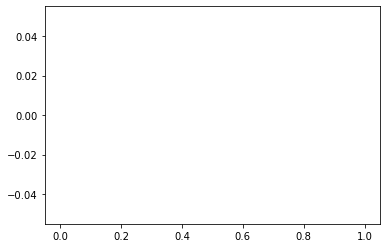

0

In [9]:
from matplotlib import pyplot as plt
plt.hist([i[0] for i in solution])
plt.show()

len(solution)
len([i for i in solution if i[0]<4])
